In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor as DTRegressor
from sklearn.ensemble import RandomForestRegressor as RFRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import pickle

In [2]:
df = pd.read_csv("heart_risk.csv")

In [3]:
#дивимось на дані, їх структуру
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1


In [4]:
df.shape

(1000, 10)

In [5]:
df.columns

Index(['isMale', 'isBlack', 'isSmoker', 'isDiabetic', 'isHypertensive', 'Age',
       'Systolic', 'Cholesterol', 'HDL', 'Risk'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isMale          1000 non-null   int64  
 1   isBlack         1000 non-null   int64  
 2   isSmoker        1000 non-null   int64  
 3   isDiabetic      1000 non-null   int64  
 4   isHypertensive  1000 non-null   int64  
 5   Age             1000 non-null   int64  
 6   Systolic        1000 non-null   int64  
 7   Cholesterol     1000 non-null   int64  
 8   HDL             1000 non-null   int64  
 9   Risk            1000 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 78.3 KB


In [7]:
#кількість пропущених значень в даних
df.isnull().sum()

isMale            0
isBlack           0
isSmoker          0
isDiabetic        0
isHypertensive    0
Age               0
Systolic          0
Cholesterol       0
HDL               0
Risk              0
dtype: int64

In [8]:
#статистика по колонкам
df.describe()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.49000,0.530000,0.516000,0.522000,0.495000,59.107000,144.249000,164.043000,59.603000,19.667000
std,0.50015,0.499349,0.499994,0.499766,0.500225,11.536492,31.774528,20.329891,23.863505,17.043941
min,0.00000,0.000000,0.000000,0.000000,0.000000,40.000000,90.000000,130.000000,20.000000,0.100000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,49.000000,117.000000,146.000000,39.000000,6.300000
50%,0.00000,1.000000,1.000000,1.000000,0.000000,59.000000,144.000000,164.000000,59.000000,14.400000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,69.000000,171.000000,182.000000,81.000000,29.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,79.000000,200.000000,200.000000,100.000000,85.400000


In [9]:
#кількість унікальних значень по колонках
df.nunique()

isMale              2
isBlack             2
isSmoker            2
isDiabetic          2
isHypertensive      2
Age                40
Systolic          111
Cholesterol        71
HDL                81
Risk              439
dtype: int64

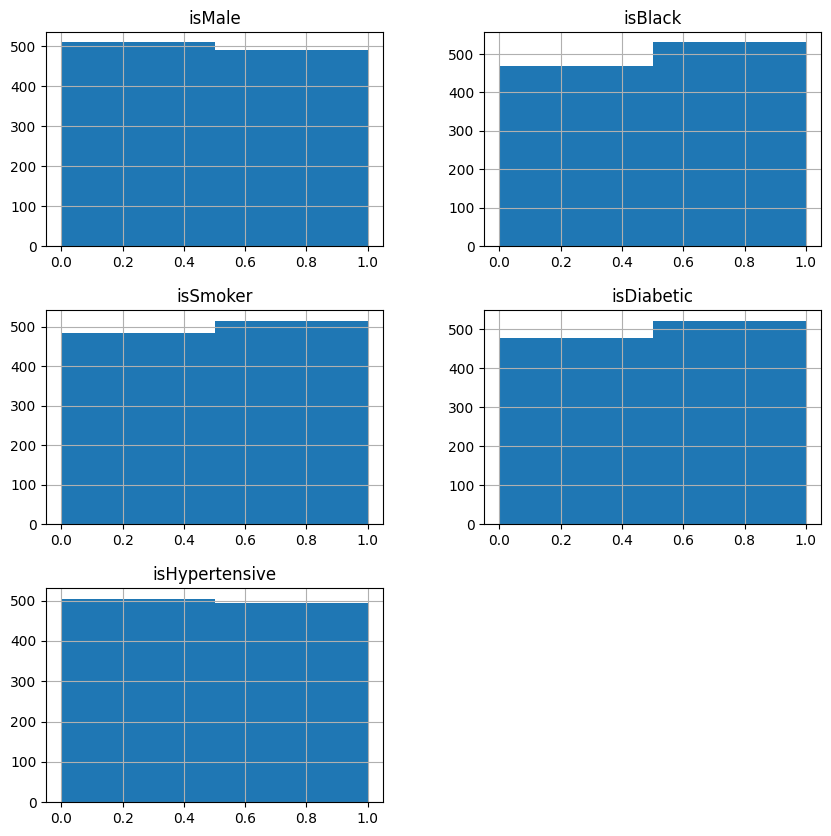

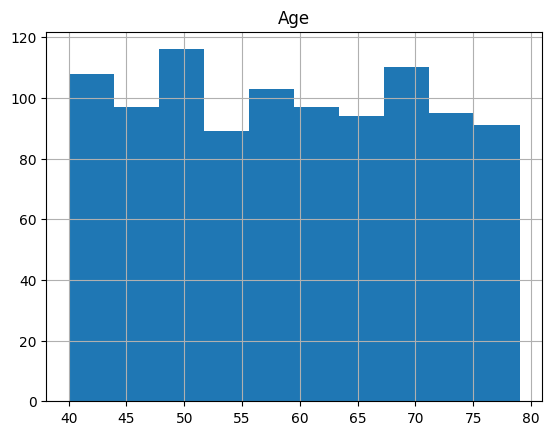

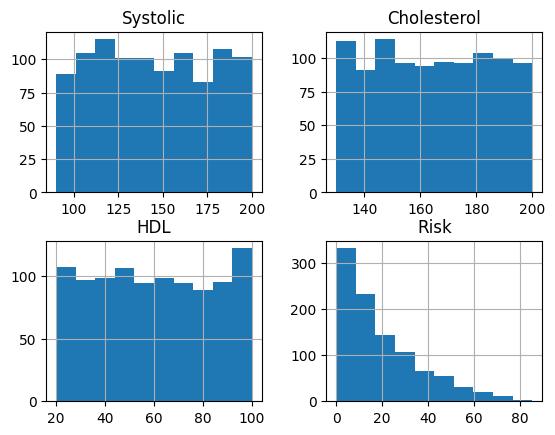

In [10]:
# візуальне представлення даних 
df[["isMale", "isBlack", "isSmoker", "isDiabetic", "isHypertensive"]].hist(figsize=(10,10),bins=2)
df[["Age"]].hist(bins=10)
df[["Systolic", "Cholesterol", "HDL", "Risk"]].hist(bins=10)
plt.show()

In [11]:
#кореляція між даними
df.corr()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
isMale,1.000000,0.049299,-0.023377,-0.015138,0.013803,-0.024536,-0.018393,0.010527,-0.016058,0.113547
isBlack,0.049299,1.000000,-0.050036,-0.062814,0.010620,0.031675,-0.036274,-0.001064,0.035652,0.056160
isSmoker,-0.023377,-0.050036,1.000000,0.026631,-0.001681,-0.030753,0.048863,-0.020108,-0.007899,0.257000
isDiabetic,-0.015138,-0.062814,0.026631,1.000000,0.030471,0.052632,-0.006491,-0.005167,-0.017774,0.348298
isHypertensive,0.013803,0.010620,-0.001681,0.030471,1.000000,0.022209,0.026498,-0.033790,-0.028803,0.180308
Age,-0.024536,0.031675,-0.030753,0.052632,0.022209,1.000000,0.020072,0.011513,0.037976,0.636025
Systolic,-0.018393,-0.036274,0.048863,-0.006491,0.026498,0.020072,1.000000,-0.058305,0.032995,0.405304
Cholesterol,0.010527,-0.001064,-0.020108,-0.005167,-0.033790,0.011513,-0.058305,1.000000,0.002057,0.053495
HDL,-0.016058,0.035652,-0.007899,-0.017774,-0.028803,0.037976,0.032995,0.002057,1.000000,-0.115759
Risk,0.113547,0.056160,0.257000,0.348298,0.180308,0.636025,0.405304,0.053495,-0.115759,1.000000


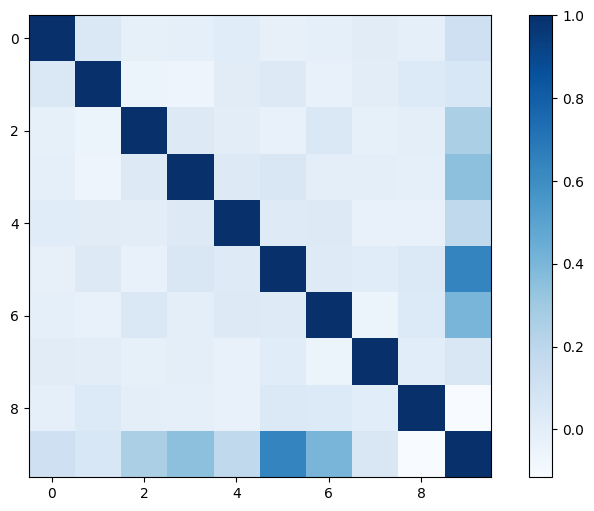

In [12]:
# відображення на кольоровій діаграмі
#from matplotlib import colormaps
#list(colormaps)
plt.figure(figsize = (10,6))
plt.imshow(df.corr(), cmap='Blues', interpolation='nearest') 
plt.colorbar()
plt.show()
# слабка кореляція між Features, тільки між Age і Risk маємо 0.64, та між Systolic і Risk маємо 0.41

In [13]:
#scaling features -- min-max normalization -- all column besides last ("Risk")
for i in range(df.shape[1] - 1):
    x_max = max(df.iloc[:, i])
    x_min = min(df.iloc[:, i])
    df.iloc[:, i] = (df.iloc[:, i] - x_min) / (x_max - x_min)
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1.0,1.0,0.0,1.0,1.0,0.230769,0.100000,0.728571,0.1500,11.1
1,0.0,0.0,0.0,1.0,1.0,0.743590,0.700000,0.357143,0.4875,30.1
2,0.0,1.0,1.0,1.0,1.0,0.256410,0.827273,0.242857,0.4875,37.6
3,1.0,1.0,1.0,1.0,0.0,0.051282,0.500000,0.514286,0.3250,13.2
4,0.0,0.0,1.0,0.0,1.0,0.666667,0.400000,0.985714,0.5375,15.1


In [14]:
# визначаємо y_df, -- labels
y_df = df.iloc[:, -1:] / 100    # Risk is in [%]
y_df.head()

,Risk
0,0.111
1,0.301
2,0.376
3,0.132
4,0.151


In [15]:
# робимо зріз df for features
x_df = df.iloc[:, 0:-1]
x_df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL
0,1.0,1.0,0.0,1.0,1.0,0.230769,0.100000,0.728571,0.1500
1,0.0,0.0,0.0,1.0,1.0,0.743590,0.700000,0.357143,0.4875
2,0.0,1.0,1.0,1.0,1.0,0.256410,0.827273,0.242857,0.4875
3,1.0,1.0,1.0,1.0,0.0,0.051282,0.500000,0.514286,0.3250
4,0.0,0.0,1.0,0.0,1.0,0.666667,0.400000,0.985714,0.5375


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.7, random_state=10)

In [17]:
y_train.shape

(700, 1)

(array([92., 73., 40., 37., 22., 17.,  8.,  5.,  3.,  3.]),
 array([0.002 , 0.0752, 0.1484, 0.2216, 0.2948, 0.368 , 0.4412, 0.5144,
        0.5876, 0.6608, 0.734 ]),
 <BarContainer object of 10 artists>)

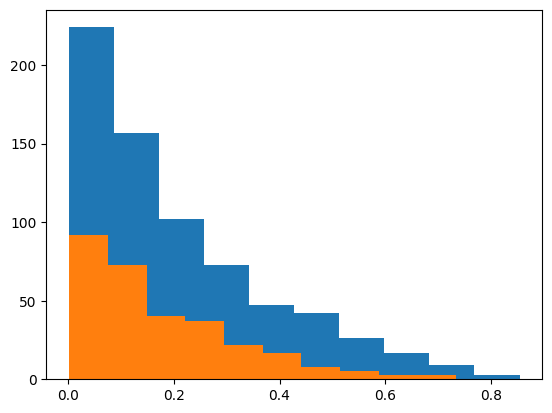

In [18]:
#візуалізація розподілів y_train i y_test
plt.hist(y_train)
plt.hist(y_test)

In [19]:
x_train.shape

(700, 9)

In [20]:
#Hyperparameters that you do NOT tune and simply use default values
criterion = 'squared_error' # this is actually MSE
splitter = 'best'
random_state = 9

In [61]:
hparams_grid = {'max_depth': [3, 4, 5, 6, 7],
                'min_samples_leaf': [30, 35, 40, 45, 75],
                'max_features': [1],
                }              

In [62]:
model = DTRegressor(criterion='squared_error', splitter = 'best', random_state = 9)

In [63]:
# Init Grid Search Cross-Validation
# Use cv = 5, scoring = 'neg_mean_squared_error' (MSE), verbose = 3 and return_train_score = True
gs_ds = GridSearchCV(estimator=model, param_grid=hparams_grid, cv = 5, scoring = 'neg_mean_squared_error', verbose = 3, error_score='raise', return_train_score = True)

In [64]:
# Run Grid Search Cross-Validation, it is the most time consuming part
gs_ds.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=30;, score=(train=-0.025, test=-0.031) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=30;, score=(train=-0.022, test=-0.020) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=30;, score=(train=-0.026, test=-0.026) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=1, min_samples_leaf=30;, score=(train=-0.021, test=-0.026) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=1, min_samples_leaf=30;, score=(train=-0.025, test=-0.030) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=1, min_samples_leaf=35;, score=(train=-0.025, test=-0.031) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=1, min_samples_leaf=35;, score=(train=-0.022, test=-0.020) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=1, min_samples_leaf=35;, score=(train=-0.026, test=-0.026) total time=   0.0s
[C

GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeRegressor(random_state=9),
             param_grid={'max_depth': [3, 4, 5, 6, 7], 'max_features': [1],
                         'min_samples_leaf': [30, 35, 40, 45, 75]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [65]:
# Extract total results of Grid Search Cross-Validation
gs_results = gs_ds.cv_results_
gs_results

{'mean_fit_time': array([0.00354772, 0.00261207, 0.00309401, 0.00228763, 0.00266409,
        0.00305386, 0.00302858, 0.00303864, 0.00306554, 0.00253005,
        0.00305347, 0.00321822, 0.00301952, 0.00282707, 0.00201921,
        0.00241871, 0.00303731, 0.00306392, 0.00259981, 0.00290751,
        0.00280623, 0.00287957, 0.00284896, 0.00322652, 0.0028018 ]),
 'std_fit_time': array([8.76764081e-04, 3.69736575e-04, 5.80521743e-04, 3.94470265e-04,
        5.37744297e-04, 4.92338820e-04, 5.36168135e-05, 6.36918230e-04,
        5.84984945e-05, 6.05638370e-04, 6.37719384e-05, 7.44353165e-04,
        3.82961100e-05, 4.16947747e-04, 3.86021400e-05, 4.75141859e-04,
        4.52228198e-05, 8.03778304e-05, 4.90154518e-04, 2.71139898e-04,
        4.03614823e-04, 3.83105983e-04, 3.65993676e-04, 3.89774143e-04,
        4.00867745e-04]),
 'mean_score_time': array([0.00194669, 0.00214214, 0.00176702, 0.00223384, 0.0020267 ,
        0.00201373, 0.0018239 , 0.00200176, 0.0018703 , 0.00210543,
        0.00

In [66]:
gs_mean_test_score = gs_results['mean_test_score'].reshape(len(hparams_grid['max_depth']), len(hparams_grid['min_samples_leaf']))
gs_std_test_score = gs_results['std_test_score'].reshape(len(hparams_grid['max_depth']), len(hparams_grid['min_samples_leaf']))
gs_mean_train_score = gs_results['mean_train_score'].reshape(len(hparams_grid['max_depth']), len(hparams_grid['min_samples_leaf']))
gs_std_train_score = gs_results['std_train_score'].reshape(len(hparams_grid['max_depth']), len(hparams_grid['min_samples_leaf']))

In [67]:
print(hparams_grid['max_depth'])
gs_mean_test_score = gs_results['mean_test_score'].reshape(len(hparams_grid['max_depth']), len(hparams_grid['min_samples_leaf']))
print(gs_mean_test_score)    
gs_std_test_score = gs_results['std_test_score'].reshape(len(hparams_grid['max_depth']), len(hparams_grid['min_samples_leaf']))
print(gs_std_test_score)  
gs_mean_train_score = gs_results['mean_train_score'].reshape(len(hparams_grid['max_depth']), len(hparams_grid['min_samples_leaf']))
print(gs_mean_train_score) 
gs_std_train_score = gs_results['std_train_score'].reshape(len(hparams_grid['max_depth']), len(hparams_grid['min_samples_leaf']))
print(gs_std_train_score) 

[3, 4, 5, 6, 7]
[[-0.02669319 -0.02550444 -0.02550444 -0.02412725 -0.02732135]
 [-0.02364198 -0.02076604 -0.02035659 -0.02414433 -0.02732135]
 [-0.02350916 -0.02248946 -0.02035659 -0.02414433 -0.02732135]
 [-0.02350916 -0.02248946 -0.02035659 -0.02414433 -0.02732135]
 [-0.02350916 -0.02248946 -0.02035659 -0.02414433 -0.02732135]]
[[0.00376684 0.00339098 0.00339098 0.00201597 0.00212364]
 [0.00214969 0.00384557 0.00281222 0.00255517 0.00212364]
 [0.00195645 0.00401298 0.00281222 0.00255517 0.00212364]
 [0.00195645 0.00401298 0.00281222 0.00255517 0.00212364]
 [0.00195645 0.00401298 0.00281222 0.00255517 0.00212364]]
[[-0.02375633 -0.02304184 -0.02304184 -0.0223225  -0.0260601 ]
 [-0.02249439 -0.01855875 -0.01818483 -0.02219778 -0.0260601 ]
 [-0.02156461 -0.02044086 -0.01818483 -0.02219778 -0.0260601 ]
 [-0.02156461 -0.02044086 -0.01818483 -0.02219778 -0.0260601 ]
 [-0.02156461 -0.02044086 -0.01818483 -0.02219778 -0.0260601 ]]
[[0.00175052 0.00180968 0.00180968 0.00171567 0.00068395]
 [0

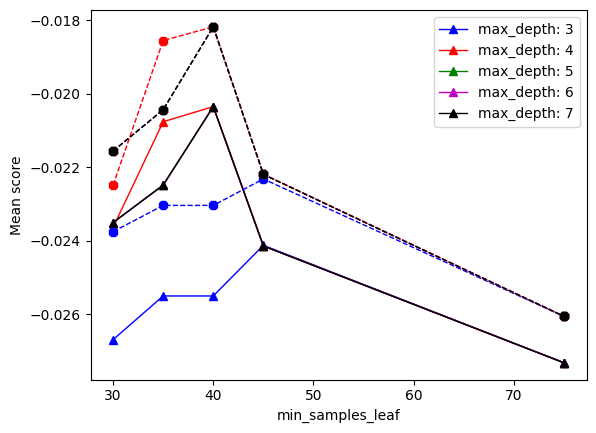

In [68]:
color_line = ['b', 'r', 'g', 'm', 'k', 'y', 'k', 'c'] 
# Visuzalize results of Grid Search Cross-Validation
for i in range(len(hparams_grid['max_depth'])):
    plt.plot(hparams_grid['min_samples_leaf'], gs_mean_test_score[i], '^-' + color_line[i], linewidth=1, label='max_depth: ' + str(hparams_grid['max_depth'][i]))
for i in range(len(hparams_grid['max_depth'])):    
    plt.plot(hparams_grid['min_samples_leaf'], gs_mean_train_score[i], '8--' + color_line[i], linewidth=1)
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean score')
plt.legend()

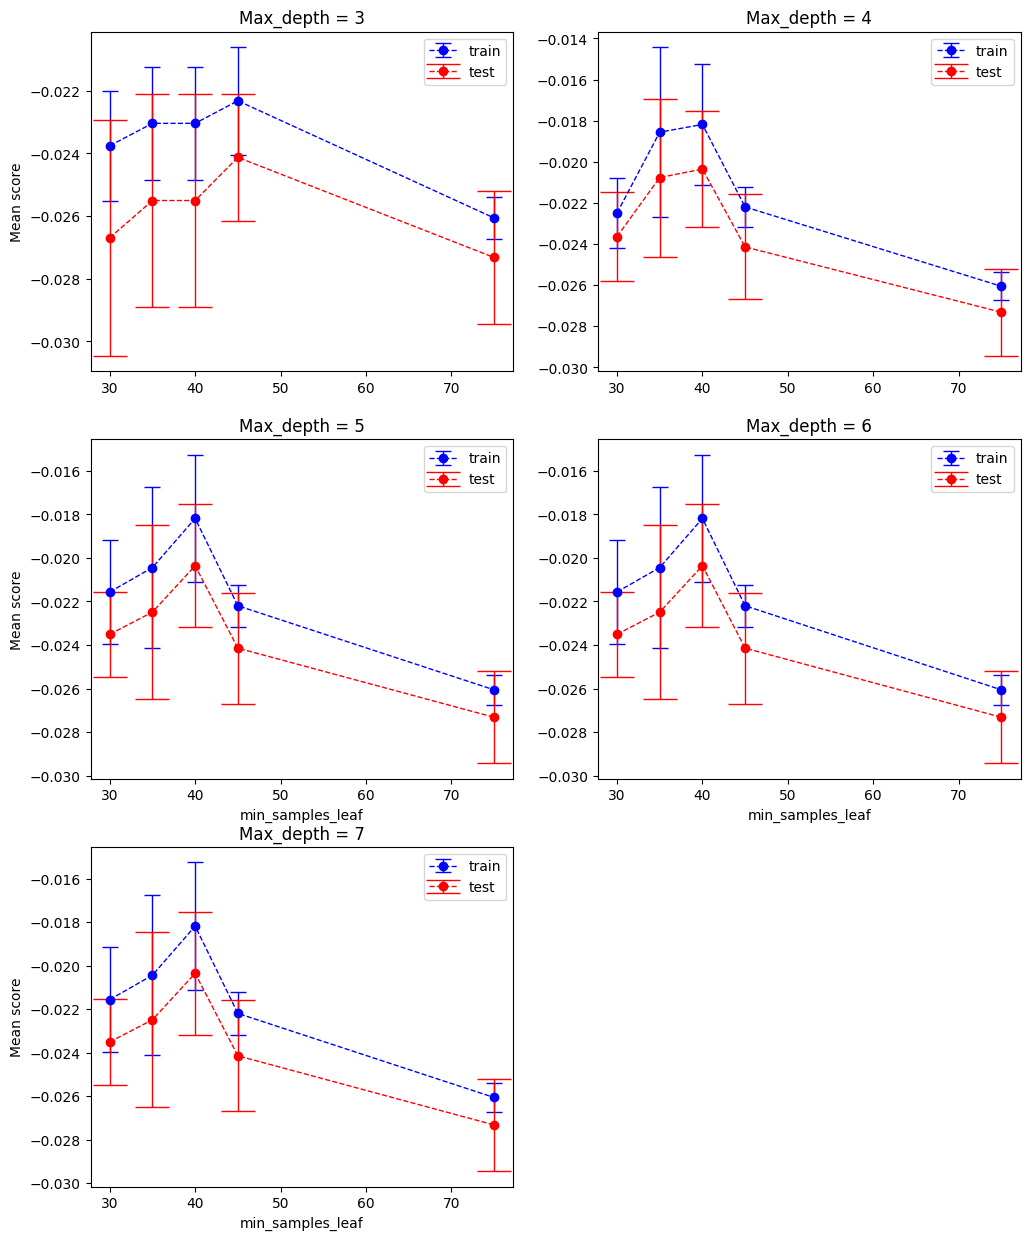

In [72]:
plt.figure(figsize=(12,15))
for i in range(len(hparams_grid['max_depth'])):
    plt.subplot(3, 2, i + 1)
    plt.errorbar(hparams_grid['min_samples_leaf'], gs_mean_train_score[i], gs_std_train_score[i], fmt='o--b', linewidth=1, capsize=6, label='train')
    plt.errorbar(hparams_grid['min_samples_leaf'], gs_mean_test_score[i], gs_std_test_score[i], fmt='o--r', linewidth=1, capsize=12, label='test')  
    plt.title('Max_depth = ' + str(hparams_grid['max_depth'][i]))
    plt.legend()
    if i > 1:
        plt.xlabel('min_samples_leaf')
    if i % 2 == 0:
        plt.ylabel('Mean score')

In [73]:
# Extract already trained the best model
my_best_model = gs_ds.best_estimator_
print(my_best_model)

DecisionTreeRegressor(max_depth=4, max_features=1, min_samples_leaf=40,
                      random_state=9)


In [74]:
# Extract hyperparameters of already trained the best model
my_best_hparams = gs_ds.best_params_
print(my_best_hparams)

{'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 40}


In [75]:
# Compute prediction scores
y_train_pred = my_best_model.predict(x_train)
y_test_pred = my_best_model.predict(x_test)

In [76]:
print(y_train_pred)

[0.0722     0.11287654 0.11287654 0.54383333 0.22790909 0.14827692
 0.14827692 0.22790909 0.14827692 0.3067619  0.256625   0.11287654
 0.18078    0.18078    0.12306522 0.3067619  0.22790909 0.3067619
 0.11287654 0.22790909 0.26242857 0.3067619  0.17977273 0.14827692
 0.28016279 0.14827692 0.14895385 0.12306522 0.12306522 0.26242857
 0.11287654 0.0722     0.26242857 0.0722     0.54383333 0.26242857
 0.28016279 0.18078    0.18585714 0.14895385 0.18078    0.0722
 0.3067619  0.12306522 0.17977273 0.12306522 0.14827692 0.11287654
 0.54383333 0.17977273 0.11287654 0.256625   0.11287654 0.14895385
 0.11287654 0.256625   0.14827692 0.54383333 0.14895385 0.256625
 0.26242857 0.18078    0.14827692 0.12306522 0.17977273 0.11287654
 0.256625   0.14827692 0.14895385 0.17977273 0.18078    0.18585714
 0.14827692 0.14895385 0.256625   0.3067619  0.26242857 0.11287654
 0.11287654 0.256625   0.18585714 0.3067619  0.11287654 0.18585714
 0.54383333 0.18078    0.14895385 0.11287654 0.54383333 0.18585714
 0

In [77]:
print(y_test_pred)

[0.256625   0.18585714 0.0722     0.28016279 0.18585714 0.28016279
 0.3067619  0.14895385 0.14895385 0.14827692 0.18585714 0.28016279
 0.14895385 0.14895385 0.11287654 0.22790909 0.14827692 0.0722
 0.14895385 0.0722     0.18078    0.26242857 0.26242857 0.3067619
 0.11287654 0.18585714 0.12306522 0.11287654 0.11287654 0.18585714
 0.18585714 0.22790909 0.18078    0.22790909 0.26242857 0.28016279
 0.14895385 0.26242857 0.26242857 0.18585714 0.12306522 0.14895385
 0.14827692 0.18585714 0.26242857 0.14827692 0.26242857 0.28016279
 0.0722     0.17977273 0.14895385 0.28016279 0.3067619  0.18078
 0.14827692 0.14895385 0.11287654 0.22790909 0.256625   0.11287654
 0.12306522 0.11287654 0.28016279 0.18585714 0.18585714 0.26242857
 0.256625   0.11287654 0.28016279 0.22790909 0.3067619  0.11287654
 0.14895385 0.3067619  0.26242857 0.14827692 0.3067619  0.11287654
 0.14827692 0.14827692 0.11287654 0.3067619  0.0722     0.0722
 0.18078    0.11287654 0.0722     0.17977273 0.14895385 0.28016279
 0.1230

(array([66., 79., 60., 28., 57.,  0.,  0.,  0.,  0., 10.]),
 array([0.0722    , 0.11936333, 0.16652667, 0.21369   , 0.26085333,
        0.30801667, 0.35518   , 0.40234333, 0.44950667, 0.49667   ,
        0.54383333]),
 <BarContainer object of 10 artists>)

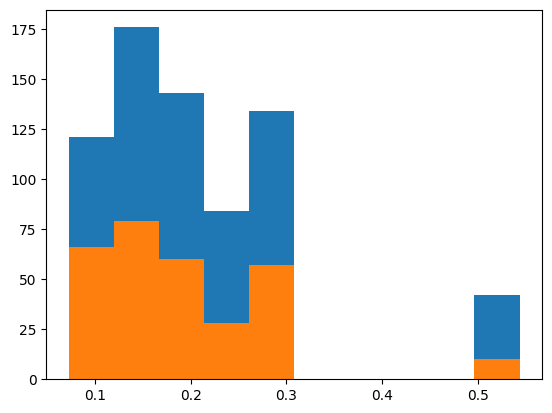

In [78]:
plt.hist(y_train_pred)
plt.hist(y_test_pred)

In [ ]:
# Extimate train & test errors with RMSE
# RMSE is just square root of MSE, RMSE has the same units as y
